In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
breast_cancer = sklearn.datasets.load_breast_cancer()
X = breast_cancer.data
Y = breast_cancer.target
print(X.shape, Y.shape)
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
print(data.head())
print(data.describe())
print(data['class'].value_counts())
print(breast_cancer.target_names)
print(data.groupby('class').mean())

(569, 30) (569,)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area 

In [2]:
from sklearn.model_selection import train_test_split
X = data.drop('class', axis=1)
Y = data['class']
print(type(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(Y.shape, Y_train.shape, Y_test.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)
print(X_train.mean(), X_test.mean(), X.mean())

<class 'pandas.core.frame.DataFrame'>
(569,) (426,) (143,)
mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

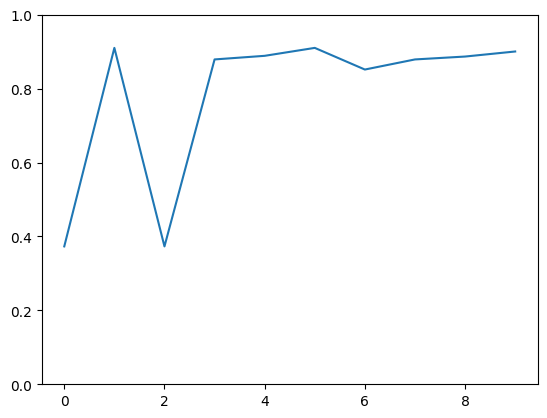

Test Accuracy: 0.9473684210526315


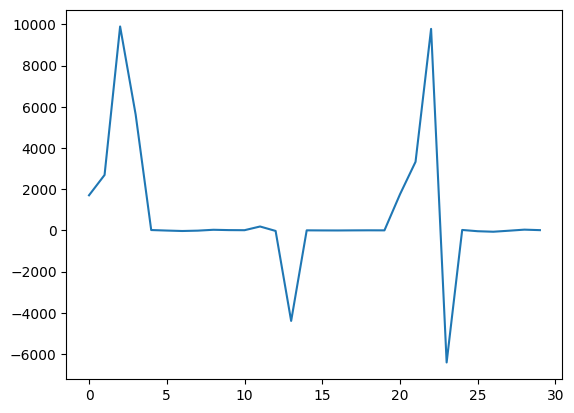

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self):
        self.w = None
        self.b = None
    
    def model(self, x):
        return 1 if np.dot(self.w, x) >= self.b else 0
    
    def predict(self, X):
        Y = [self.model(x) for x in X]
        return np.array(Y)
    
    def fit(self, X, Y, epochs=1):
        # Initialize weights (1s for each feature) and bias (0)
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        wt_matrix = []
        
        for i in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + x
                    self.b = self.b - 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - x
                    self.b = self.b + 1
            wt_matrix.append(self.w.copy())
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if accuracy[i] > max_accuracy:
                max_accuracy = accuracy[i]
                chkptw = self.w.copy()
                chkptb = self.b
        
        self.w = chkptw
        self.b = chkptb
        print(f"Max Accuracy: {max_accuracy}")
        plt.plot(list(accuracy.values()))
        plt.ylim([0, 1])
        plt.show()
        return np.array(wt_matrix)

# Assuming X_train, Y_train, X_test, and Y_test are your datasets
# Ensure they are numeric
X_train = X_train.astype(float)  # Convert to float
X_test = X_test.astype(float)    # Convert to float
Y_train = Y_train.astype(int)    # Convert to int (0 or 1)
Y_test = Y_test.astype(int)      # Convert to int (0 or 1)

# Debugging data types and shapes
print(X_train.dtypes)  # Check data types of each column
print(Y_train.dtype)   # Check label type (should be int)
print(X_train.head())  # Print first 5 rows of X_train
print(Y_train.head())  # Print first 5 labels

# Convert DataFrame to NumPy array for model fitting
X_train = X_train.to_numpy()  # Convert to NumPy array for dot product
X_test = X_test.to_numpy()    # Convert to NumPy array for dot product

# Train Perceptron
perceptron = Perceptron()
wt_matrix = perceptron.fit(X_train, Y_train, 10)

# Test prediction accuracy
Y_pred_test = perceptron.predict(X_test)
print(f"Test Accuracy: {accuracy_score(Y_pred_test, Y_test)}")

# Plot weights after final epoch
plt.plot(wt_matrix[-1, :])
plt.show()
